### Preparing the IMDB dataset

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data ...')
(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=max_features)
print(len(train_x), ' train sequences')
print(len(test_x), ' test sequences')

print('Pad sequence (samples by time)')
train_x_cutoff = sequence.pad_sequences(train_x, maxlen)
test_x_cutoff = sequence.pad_sequences(test_x, maxlen)
print('input train shape:', train_x_cutoff.shape)
print('input test shape:', test_x_cutoff.shape)

Using TensorFlow backend.


Loading data ...
(25000, ' train sequences')
(25000, ' test sequences')
Pad sequence (samples by time)
('input train shape:', (25000, 500))
('input test shape:', (25000, 500))


### Training the model with Embedding and SimpleRNN layers

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

emb_output_size = 32

model = Sequential()
model.add(Embedding(max_features, emb_output_size, input_length=maxlen))
model.add(LSTM(emb_output_size))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(train_x_cutoff, train_y, epochs=10, batch_size=128, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.5031 - acc: 0.7687 - val_loss: 0.3424 - val_acc: 0.8668
Epoch 2/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.2943 - acc: 0.8828 - val_loss: 0.2997 - val_acc: 0.8750
Epoch 3/10
20000/20000 [==============================] - 78s 4ms/step - loss

### Plotting Results

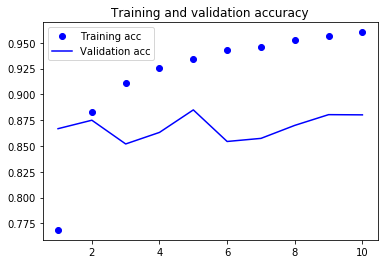

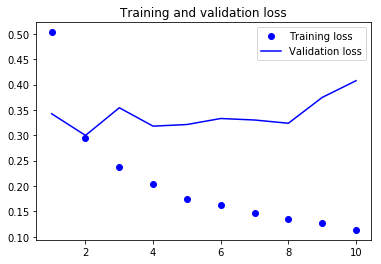

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()